### Simple linear regression
- Simple linear regression models the relationship between a dependent variable and a single independent variable. In this article, we will explore simple linear regression and it's implementation in Python using libraries such as NumPy, Pandas, and scikit-learn.
- The relationship between the dependent and independent variables is represented by the simple linear equation:

y = mx + b
y = mx+b

Here:

y is the predicted value (dependent variable).
m is the slope of the line
x is the independent variable.
b is the y-intercept (the value of y when x is 0).
In this equation m signifies the slope of the line indicating how much y changes for a one-unit increase in x, a positive m suggests a direct relationship while a negative m indicates an inverse relationship.

To better understand this relationship we can express it in a more statistical context using the linear regression formula:

Y = β0 + β1x

In [5]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris

In [6]:
## Loading and exploring the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
## Using the housing dataset
df1 = pd.read_csv("house_price_regression_dataset.csv")
df1

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [12]:
### Checking for missing values in my dataset
df1.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [14]:
df1.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

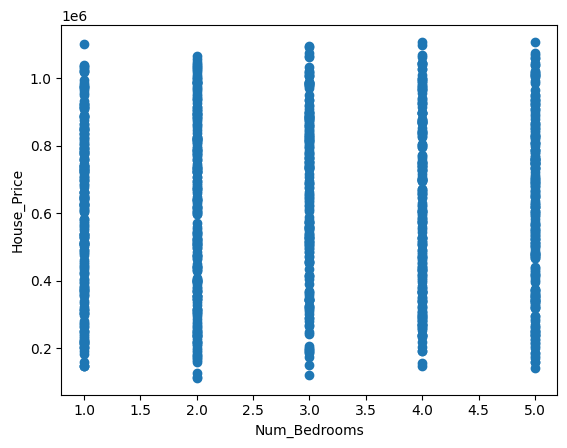

In [29]:
## Checking the correlation
plt.scatter(x=df1['Num_Bedrooms'],y=df1['House_Price'])
plt.xlabel('Num_Bedrooms')
plt.ylabel('House_Price')
plt.show()

Text(0, 0.5, 'House_Price')

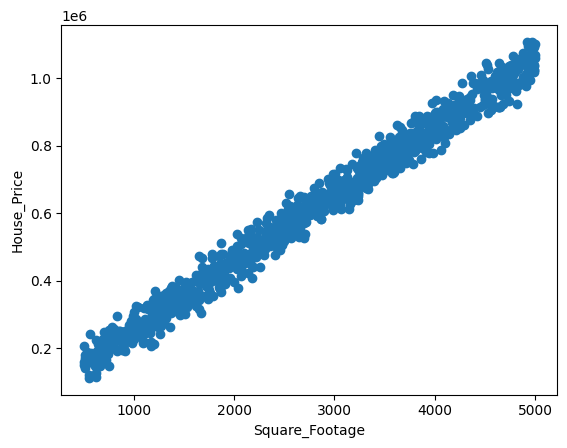

In [30]:
## Checking the correlation between Square_footage and Housing price
plt.scatter(x=df1['Square_Footage'],y=df1['House_Price'])
plt.xlabel('Square_Footage')
plt.ylabel('House_Price')

<Axes: >

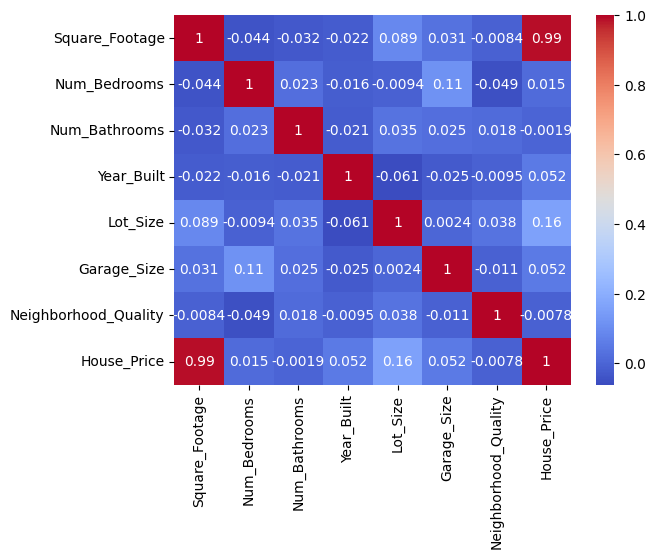

In [33]:
## Using a heatmap to check the correlation
corr_matrix  = df1.corr()
sns.heatmap(data=corr_matrix,annot=True,cmap='coolwarm')

In [34]:
## Choosing my independent and dependent variables
x = df1[['Square_Footage']]
y = df1['House_Price']

In [35]:
## Splitting the data into training and testing
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(f'The training set has a size of {x_train.shape[0]}')
print(f'The testing set has a size of {x_test.shape[0]}')

The training set has a size of 800
The testing set has a size of 200


In [ ]:
### Training the simple LinearRegression model in order to get the y-ntercept and gradient
model  = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
print(f'The y-intercept parameter of the model is: {model.intercept_}')
print(f'The gradient of the model is: {model.coef_}')

The y-intercept parameter of the model is: 54229.05859587679
The gradient of the model is: [200.55687687]


In [42]:
## Make predictions
y_pred = model.predict(x_test)
## Display the first few predictions alongside their actual values
predictions = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
521,9.010005e+05,8.588632e+05
737,4.945375e+05,5.175154e+05
740,9.494042e+05,9.984508e+05
660,1.040389e+06,1.043376e+06
411,7.940100e+05,7.854594e+05
...,...,...
408,8.245296e+05,8.097268e+05
332,1.803936e+05,1.777721e+05
208,9.658167e+05,9.549300e+05
613,4.336642e+05,4.268637e+05


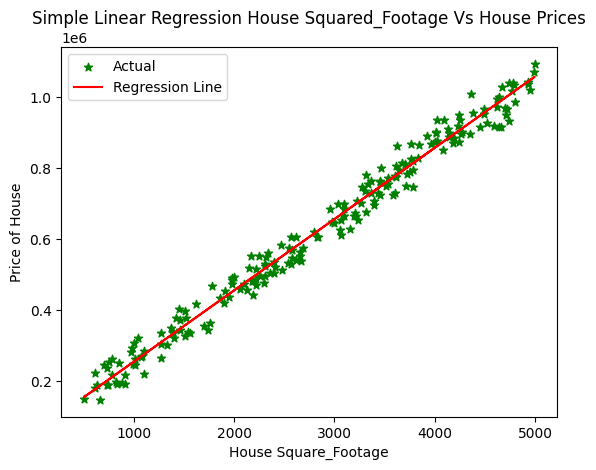

In [53]:
## Visualizing the regression line
## Here we plot the regression line alongside the actual points
plt.scatter(x=x_test,y=y_test,color='green',label='Actual',marker='*')

## Plot the regression line
plt.plot(x_test,y_pred,color='red',label='Regression Line')
## Adding lebels
plt.xlabel('House Square_Footage')
plt.ylabel('Price of House')
plt.title('Simple Linear Regression House Squared_Footage Vs House Prices'.center(1))
plt.legend()
plt.show()

In [54]:
## Evaluating the model
mse = mean_squared_error(x_test,y_pred)
print(f'The mean squar error is: {mse}')
r2 = r2_score(y_test,y_pred)
print(f'The R-Squared score is: {r2}')

The mean squar error is: 444902754493.0575
The R-Squared score is: 0.9832220800154357
